In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
dataset = pd.read_excel("Online retail.xlsx")
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
dataset.shape

(541909, 8)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [62]:
#dataset[["StockCode", "Description"]].groupby(["StockCode"]).head()
#dataset[["StockCode", "Description"]].groupby(["StockCode"]).nunique()
#dataset[["StockCode", "Description"]].groupby(["StockCode"]).nunique()["Description"].plot.hist()
#dataset[["StockCode", "Description"]].groupby(["StockCode"]).nunique()["Description"].value_counts()

In [38]:
#grp_product = dataset[["StockCode", "Description"]].groupby(["StockCode"]).nunique()

In [39]:
#grp_product[grp_product["Description"] == 5]

In [40]:
#des5_stock_list = grp_product[grp_product["Description"] == 5].index.tolist()

In [41]:
#des5_stock_list

In [42]:
#dataset[dataset["StockCode"].isin(des5_stock_list)]
#dataset[dataset["StockCode"] == des5_stock_list[0]]
#dataset[dataset["StockCode"] == des5_stock_list[0]]["Description"].value_counts()
#dataset[(dataset["Description"] == "adjustment") & (dataset["StockCode"] == des5_stock_list[0])]

In [6]:
#dataset[dataset["UnitPrice"] <= 0]
#dataset[dataset["Quantity"] <= 0]
#dataset[(dataset["Quantity"] <= 0) | (dataset["UnitPrice"] <= 0)]
d1 = dataset[(dataset["Quantity"] > 0) & (dataset["UnitPrice"] > 0)] # d1 is dataset with only positive Quantity and Unit Price
d1.info()
#d1[(d1["Quantity"] <= 0) | (d1["UnitPrice"] <= 0)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


In [7]:
#d1[d1["CustomerID"] <= 0]
#d1[pd.isna(d1["CustomerID"])]
d2 = d1[pd.isna(d1["CustomerID"]) == False] # d2 is dataset with only known customers from d1
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


## RFM Analysis

In [111]:
#d2

In [8]:
d3 = d2.drop(["StockCode", "Description", "Country"], axis = 1) # d3 is dataset with only relevent columns for segmentation
#d3.info()
d3

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0
541906,581587,4,2011-12-09 12:50:00,4.15,12680.0
541907,581587,4,2011-12-09 12:50:00,4.15,12680.0


In [9]:
d3["TotalPrice"] = d3["Quantity"].mul(d3["UnitPrice"], axis = 0)

In [17]:
## Drop Quantity and Unit Price since Total Price is known
d3 = d3.drop(["Quantity", "UnitPrice"], axis = 1)
d3

,InvoiceNo,CustomerID,TotalPrice,Recency
0,536365,17850.0,15.30,394
1,536365,17850.0,20.34,394
2,536365,17850.0,22.00,394
3,536365,17850.0,20.34,394
4,536365,17850.0,20.34,394
...,...,...,...,...
541904,581587,12680.0,10.20,21
541905,581587,12680.0,12.60,21
541906,581587,12680.0,16.60,21
541907,581587,12680.0,16.60,21


In [11]:
def getyear(dt):
    return pd.to_datetime(dt).year

In [130]:
#d3["TransactionYear"] = np.vectorize(getyear)(d3["InvoiceDate"])

In [131]:
#dataset["TransactionYear"].nunique()
#d3["TransactionYear"].value_counts()

In [132]:
#d3["TransactionMonth"] = np.vectorize(lambda x: pd.to_datetime(x).month)(d3["InvoiceDate"])

In [133]:
#d3["TransactionMonth"].value_counts()

In [12]:
CeilingDate = pd.to_datetime("31-12-2011")
print((CeilingDate - d3["InvoiceDate"][0]).days)

394


In [13]:
d3["Recency"] = np.vectorize(lambda dt: (CeilingDate - dt).days)(d3["InvoiceDate"]) # More recent implies less value

In [14]:
## Drop InvoiceDate as we alredy have Recency score
d3 = d3.drop(["InvoiceDate"], axis = 1)

In [18]:
#d3["InvoiceNo"].nunique()
#d3[["InvoiceNo", "CustomerID", "Recency"]].groupby(["InvoiceNo"]).nunique()
#d3[["InvoiceNo", "CustomerID", "Recency"]].groupby(["InvoiceNo"]).nunique()["CustomerID"].nunique()
d3[["InvoiceNo", "CustomerID", "Recency"]].groupby(["InvoiceNo"]).nunique()["Recency"].nunique()

1

In [19]:
#d3.info()
d3

,InvoiceNo,CustomerID,TotalPrice,Recency
0,536365,17850.0,15.30,394
1,536365,17850.0,20.34,394
2,536365,17850.0,22.00,394
3,536365,17850.0,20.34,394
4,536365,17850.0,20.34,394
...,...,...,...,...
541904,581587,12680.0,10.20,21
541905,581587,12680.0,12.60,21
541906,581587,12680.0,16.60,21
541907,581587,12680.0,16.60,21


In [64]:
#d3["CustomerID"].nunique()
#d3["CustomerID"].value_counts()
customer_17850 = d3.loc[d3["CustomerID"] == 17850]

In [65]:
customer_17850
#min(customer_17850["Recency"]) ## Recency
#len(customer_17850)  ## Frequency
#customer_17850["TotalPrice"].sum() ## Monetary

,InvoiceNo,CustomerID,TotalPrice,Recency
0,536365,17850.0,15.30,394
1,536365,17850.0,20.34,394
2,536365,17850.0,22.00,394
3,536365,17850.0,20.34,394
4,536365,17850.0,20.34,394
...,...,...,...,...
4540,536790,17850.0,30.60,393
4541,536790,17850.0,107.25,393
4542,536790,17850.0,51.00,393
4543,536791,17850.0,22.20,393


In [80]:
customer_group = d3.groupby(["CustomerID"])
customer_group.get_group(17841)

,InvoiceNo,CustomerID,TotalPrice,Recency
2037,536557,17841.0,10.50,394
2038,536557,17841.0,2.90,394
2039,536557,17841.0,1.45,394
2040,536557,17841.0,1.25,394
2041,536557,17841.0,12.75,394
...,...,...,...,...
537749,581334,17841.0,2.55,22
537750,581334,17841.0,5.04,22
537751,581334,17841.0,4.25,22
537752,581334,17841.0,2.55,22


## Find customer-wise RFM attributes

In [79]:
## Recency
customer_recency = customer_group["Recency"].apply(lambda x: min(x))
customer_recency

CustomerID
12346.0    346
12347.0     23
12348.0     96
12349.0     39
12350.0    331
          ... 
18280.0    298
18281.0    201
18282.0     28
18283.0     24
18287.0     63
Name: Recency, Length: 4338, dtype: int64

In [76]:
## Frequency
customer_frequency = customer_group["CustomerID"].apply(lambda x: len(x))
customer_frequency
#sum(customer_frequency)

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    756
18287.0     70
Name: CustomerID, Length: 4338, dtype: int64

In [82]:
## Monetary
customer_monetary = customer_group["TotalPrice"].apply(lambda x: x.sum())
customer_monetary

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
             ...   
18280.0      180.60
18281.0       80.82
18282.0      178.05
18283.0     2094.88
18287.0     1837.28
Name: TotalPrice, Length: 4338, dtype: float64

In [87]:
customer_df = pd.concat([customer_recency, customer_frequency, customer_monetary], axis = 'columns', sort=False)
customer_df

,Recency,CustomerID,TotalPrice
CustomerID,,,
12346.0,346,1,77183.60
12347.0,23,182,4310.00
12348.0,96,31,1797.24
12349.0,39,73,1757.55
12350.0,331,17,334.40
...,...,...,...
18280.0,298,10,180.60
18281.0,201,7,80.82
18282.0,28,12,178.05


In [88]:
customer_df.rename(columns = {"CustomerID" : "Frequency", "TotalPrice": "Monetary"}, inplace=True)
customer_df ## Customer specific 

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,346,1,77183.60
12347.0,23,182,4310.00
12348.0,96,31,1797.24
12349.0,39,73,1757.55
12350.0,331,17,334.40
...,...,...,...
18280.0,298,10,180.60
18281.0,201,7,80.82
18282.0,28,12,178.05


## Data Clustering

In [116]:
## Normalize attribute values
customerData = customer_df.to_numpy()
scaler = StandardScaler()
customerData_Norm = scaler.fit_transform(customerData)
customerData_Norm.shape

(4338, 3)

In [119]:
## Perform KMeans Clustering
km = KMeans(n_clusters=20, init='random', n_init=10, max_iter=30, tol=1e-04, random_state=0)
labels = km.fit_predict(customerData_Norm)
np.unique(labels, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([366, 380,  11,   4, 119, 233, 510, 179,   6, 229,  38, 259, 262,
         46,  33, 184,   4, 250, 566, 659], dtype=int64))

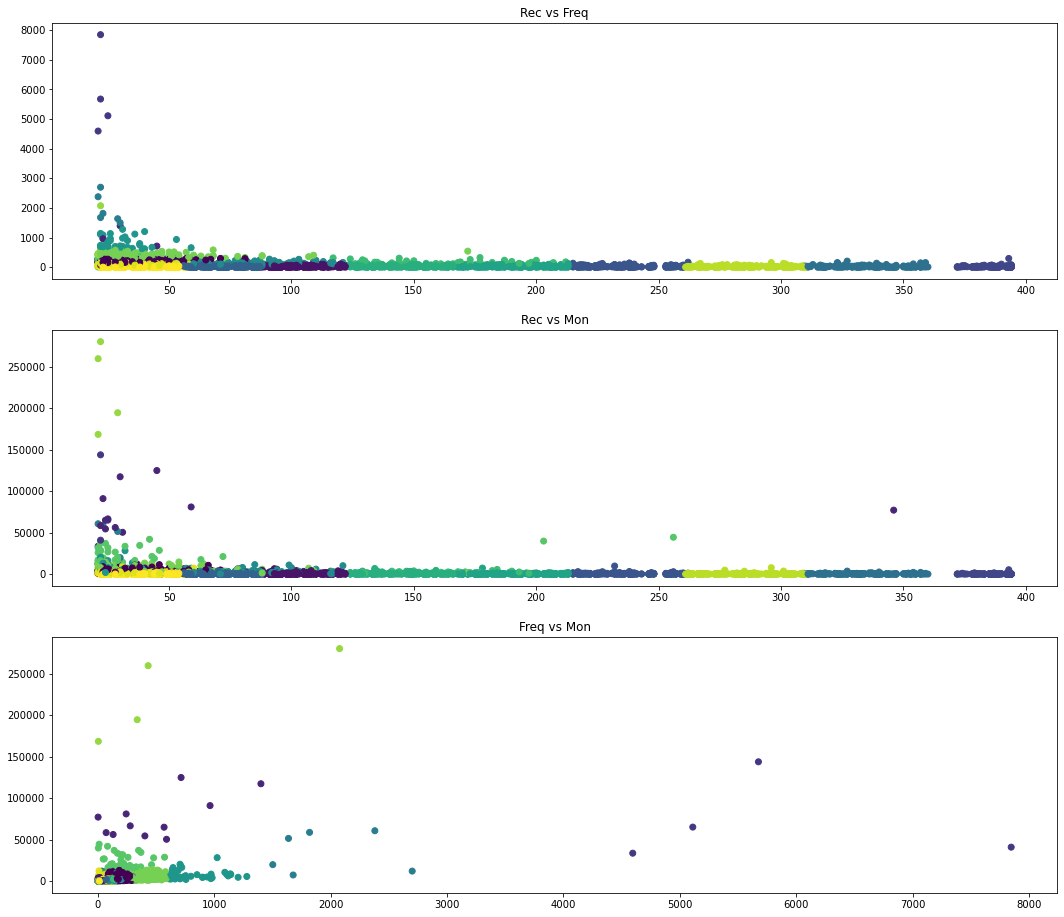

In [120]:
plt.figure(figsize=(18,16))
plt.subplot(3,1,1)
plt.scatter(customerData[:,0], customerData[:,1], c=labels)
plt.title("Rec vs Freq")
plt.subplot(3,1,2)
plt.scatter(customerData[:,0], customerData[:,2], c=labels)
plt.title("Rec vs Mon")
plt.subplot(3,1,3)
plt.scatter(customerData[:,1], customerData[:,2], c=labels)
plt.title("Freq vs Mon")
plt.show()